In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

sns.set_context('talk')

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [6]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(df, "salary_monthly_NETO", iqr_factor)
df_main_inliers = df_main_inliers[df_main_inliers["salary_monthly_NETO"] > 24000]
# Filtramos por el mínimo vital y móvil

display(len(df_main_inliers) / len(df))


0.8720262510254306

In [8]:
df_main_inliers[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      4464.0  85788.666004  39867.724585  24500.0   
Mujer                        826.0  74645.487397  33861.570050  25000.0   
Otros                         25.0  80260.000000  44573.628227  34000.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          56000.0  80000.0  105000.0  240000.0  
Mujer           49800.0  68000.0   92978.5  230000.0  
Otros           40000.0  74000.0  101000.0  190000.0

In [9]:
alpha = 0.05

In [21]:

groupA = df_main_inliers[df_main_inliers['profile_gender']=='Hombre']
groupB = df_main_inliers[df_main_inliers['profile_gender']!='Hombre']


74810.42607520563

In [74]:
import statistics
import math

def calcEst(groupA, groupB, alpha):
  meanA = groupA.mean()
  meanB = groupB.mean()
  desv_standA = statistics.stdev(groupA)
  desv_standB = statistics.stdev(groupB)
  n_A = len(groupA)
  n_B = len(groupB)
  dif_means = meanA - meanB
  varA = np.var(groupA, ddof=1)
  varB = np.var(groupB, ddof=1)
  dif_desv_nA = varA / n_A
  dif_desv_nB = varB / n_B
  raiz_ABsum = math.sqrt(dif_desv_nA + dif_desv_nB)
  interv_conf_sum = dif_means + (stats.norm.ppf((1-alpha/2)) * raiz_ABsum) 
  interv_conf_rest = dif_means - (stats.norm.ppf((1-alpha/2)) * raiz_ABsum)
  print('Diferencia entre la media del grupo A y B: ', dif_means)
  print('El intervalo de confianza va entre: ' ,interv_conf_rest," - ",interv_conf_sum)
  print('El estadístico es: ', dif_means/raiz_ABsum)

calcEst(groupA['salary_monthly_NETO'], groupB['salary_monthly_NETO'], alpha)

Diferencia entre la media del grupo A y B:  10978.239928378636
El intervalo de confianza va entre:  8399.737113128342  -  13556.74274362893
El estadístico es:  8.34474748136859


si aumento el n el intervalo de confianza se hace mas chico.

In [56]:
stats.ttest_ind(groupA['salary_monthly_NETO'], groupB['salary_monthly_NETO'], equal_var=False)


Ttest_indResult(statistic=8.344747481368538, pvalue=1.765856701540995e-16)

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

<ipython-input-75-464f62b88bba>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


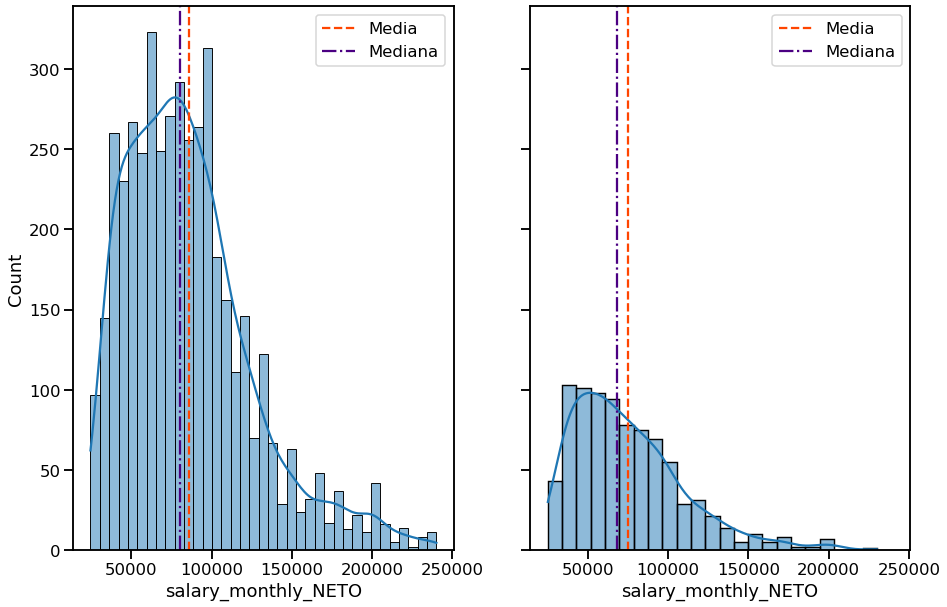

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10), sharey=True,sharex=True)

sns.histplot(data=groupA,x='salary_monthly_NETO' ,ax=ax[0],kde=True)
ax[0].axvline(groupA['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
ax[0].axvline(groupA['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

sns.histplot(data=groupB,x='salary_monthly_NETO' , ax=ax[1],kde=True)
ax[1].axvline(groupB['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
ax[1].axvline(groupB['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

ax[0].legend()
ax[1].legend()
fig.show()